In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
img = cv2.imread('nama.jpg')
img

array([[[238, 240, 241],
        [238, 240, 241],
        [238, 240, 241],
        ...,
        [233, 235, 235],
        [235, 237, 237],
        [236, 238, 238]],

       [[238, 240, 241],
        [238, 240, 241],
        [238, 240, 241],
        ...,
        [233, 235, 235],
        [235, 237, 237],
        [236, 238, 238]],

       [[238, 240, 241],
        [238, 240, 241],
        [238, 240, 241],
        ...,
        [233, 235, 235],
        [235, 237, 237],
        [236, 238, 238]],

       ...,

       [[229, 231, 232],
        [231, 233, 234],
        [233, 235, 236],
        ...,
        [227, 231, 232],
        [227, 231, 232],
        [228, 232, 233]],

       [[229, 231, 232],
        [231, 233, 234],
        [232, 234, 235],
        ...,
        [227, 231, 232],
        [227, 231, 232],
        [228, 232, 233]],

       [[229, 231, 232],
        [230, 232, 233],
        [232, 234, 235],
        ...,
        [227, 231, 232],
        [227, 231, 232],
        [228, 232, 233]]

In [33]:
img.shape

(2340, 4160, 3)

In [34]:
(baris, kolom) = img.shape[:2]

In [35]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

<function matplotlib.pyplot.show(close=None, block=None)>

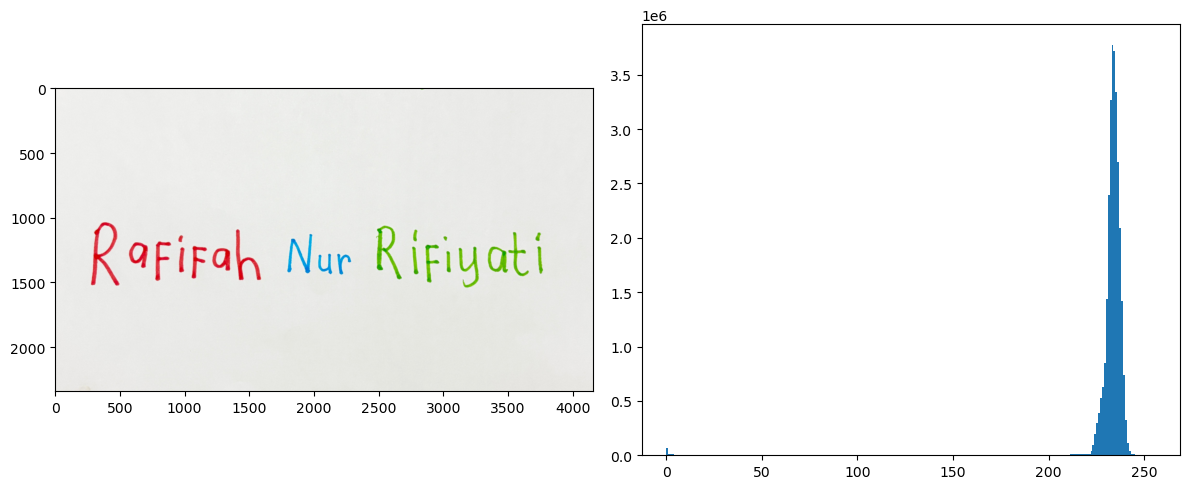

In [36]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].imshow(img)
axs[1].hist(img.ravel(),256,[0,256])
plt.tight_layout()
plt.show

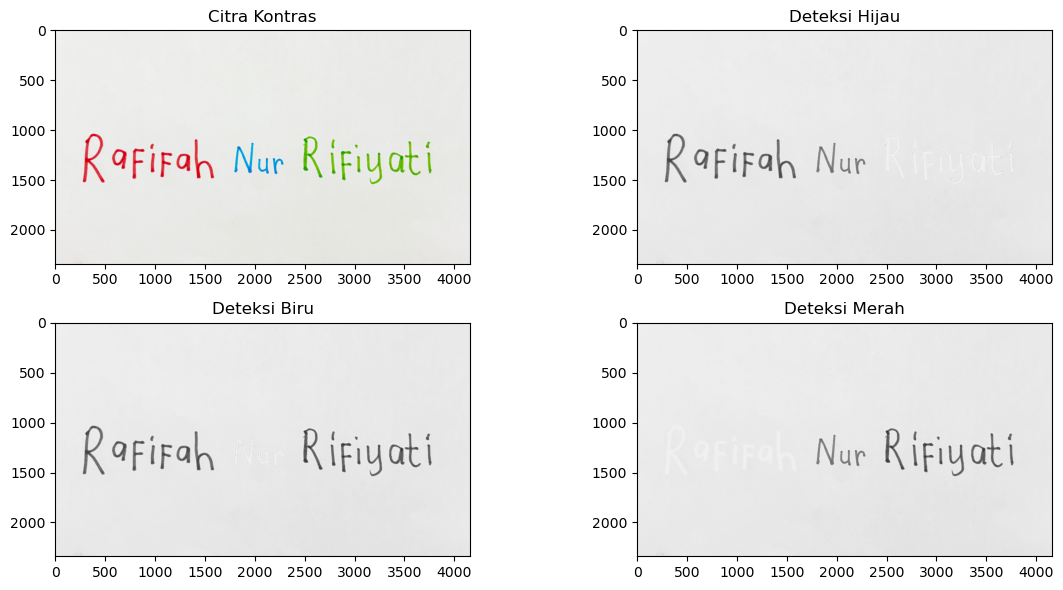

In [17]:
img_contrast = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

def masking(img, target='green'):
    hasil = np.ones_like(img) * 255
    r = img[:, :, 0].astype(np.int16)
    g = img[:, :, 1].astype(np.int16)
    b = img[:, :, 2].astype(np.int16)

    if target == 'green':
        mask = (g > r + 30) & (g > b + 30)
    elif target == 'blue':
        mask = (b > r + 30) & (b > g + 30)
    elif target == 'red':
        mask = (r > g + 30) & (r > b + 30)
    else:
        mask = np.zeros_like(r, dtype=bool)

    gray = np.mean(img, axis=2).astype(np.uint8)
    for c in range(3):
        hasil[:, :, c][~mask] = gray[~mask]
    hasil[mask] = [240, 240, 240]
    return hasil.astype(np.uint8)

deteksi_hijau = masking(img, 'green')
deteksi_biru = masking(img, 'blue')
deteksi_merah = masking(img, 'red')

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs[0, 0].imshow(img_contrast)
axs[0, 0].set_title("Citra Kontras")

axs[0, 1].imshow(deteksi_hijau)
axs[0, 1].set_title("Deteksi Hijau")

axs[1, 0].imshow(deteksi_biru)
axs[1, 0].set_title("Deteksi Biru")

axs[1, 1].imshow(deteksi_merah)
axs[1, 1].set_title("Deteksi Merah")

plt.tight_layout()
plt.show()

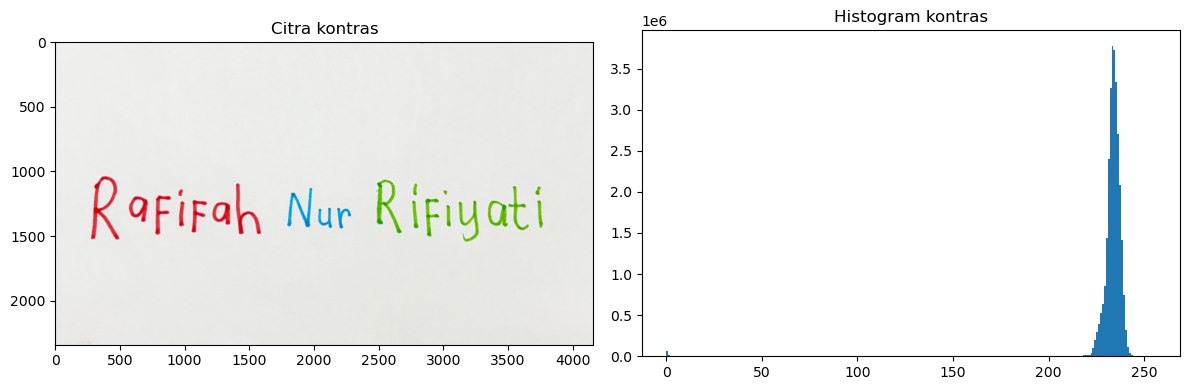

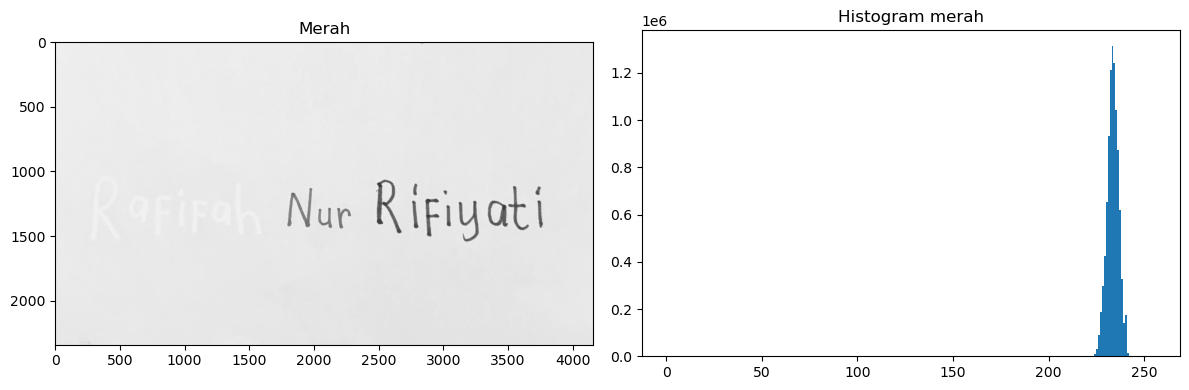

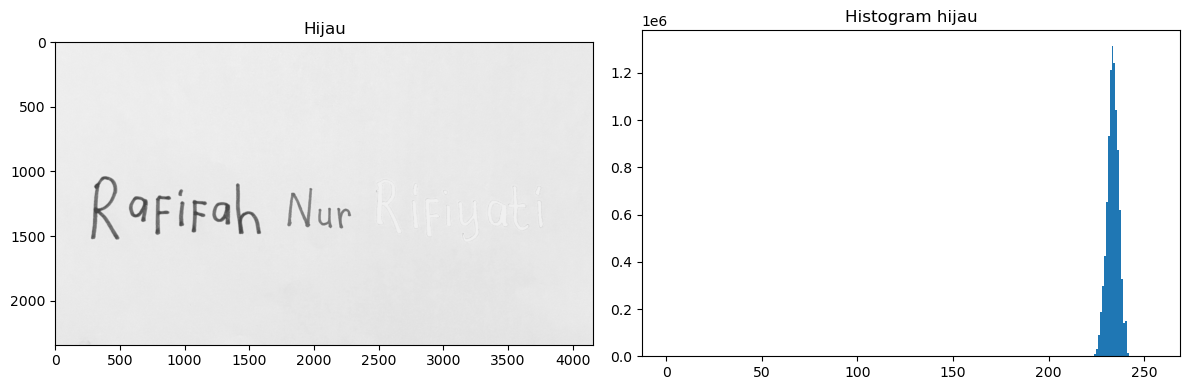

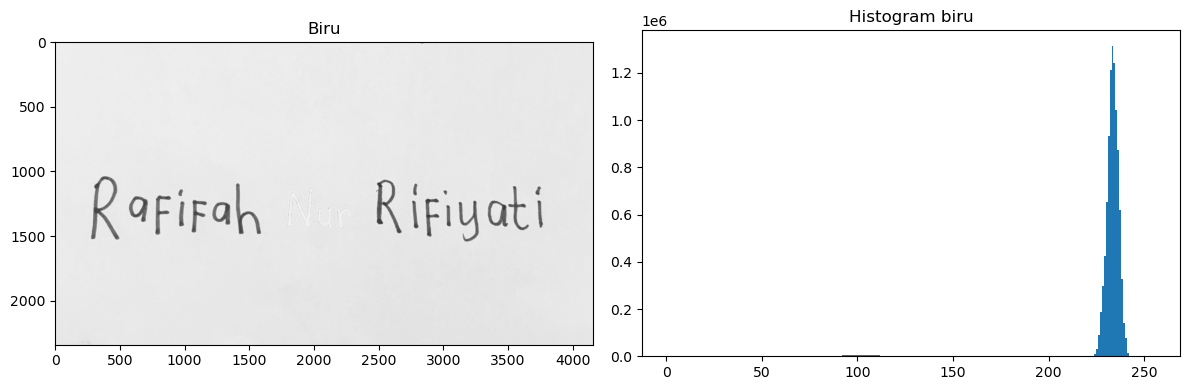

In [18]:
img_contrast = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

def masking(img, target='green'):
    hasil = np.ones_like(img) * 255
    r = img[:, :, 0].astype(np.int16)
    g = img[:, :, 1].astype(np.int16)
    b = img[:, :, 2].astype(np.int16)

    if target == 'green':
        mask = (g > r + 30) & (g > b + 30)
    elif target == 'blue':
        mask = (b > r + 30) & (b > g + 30)
    elif target == 'red':
        mask = (r > g + 30) & (r > b + 30)
    else:
        mask = np.zeros_like(r, dtype=bool)

    gray = np.mean(img, axis=2).astype(np.uint8)
    for c in range(3):
        hasil[:, :, c][~mask] = gray[~mask]
    hasil[mask] = [240, 240, 240]
    return hasil.astype(np.uint8)

deteksi_hijau = masking(img, 'green')
deteksi_biru = masking(img, 'blue')
deteksi_merah = masking(img, 'red')


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(img_contrast)
ax[0].set_title("Citra kontras")
ax[1].hist(img_contrast.ravel(), 256, [0, 256])
ax[1].set_title("Histogram kontras")
plt.tight_layout()
plt.show()

gray_r = cv2.cvtColor(deteksi_merah, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(deteksi_merah)
ax[0].set_title("Merah")
ax[1].hist(gray_r.ravel(), 256, [0, 256])
ax[1].set_title("Histogram merah")
plt.tight_layout()
plt.show()

gray_g = cv2.cvtColor(deteksi_hijau, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(deteksi_hijau)
ax[0].set_title("Hijau")
ax[1].hist(gray_g.ravel(), 256, [0, 256])
ax[1].set_title("Histogram hijau")
plt.tight_layout()
plt.show()

gray_b = cv2.cvtColor(deteksi_biru, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(deteksi_biru)
ax[0].set_title("Biru")
ax[1].hist(gray_b.ravel(), 256, [0, 256])
ax[1].set_title("Histogram biru")
plt.tight_layout()
plt.show()

Thresholds yang dihitung: {'blue': 52, 'red_blue_low': 13, 'red_blue_high': 33, 'rgb': 18}


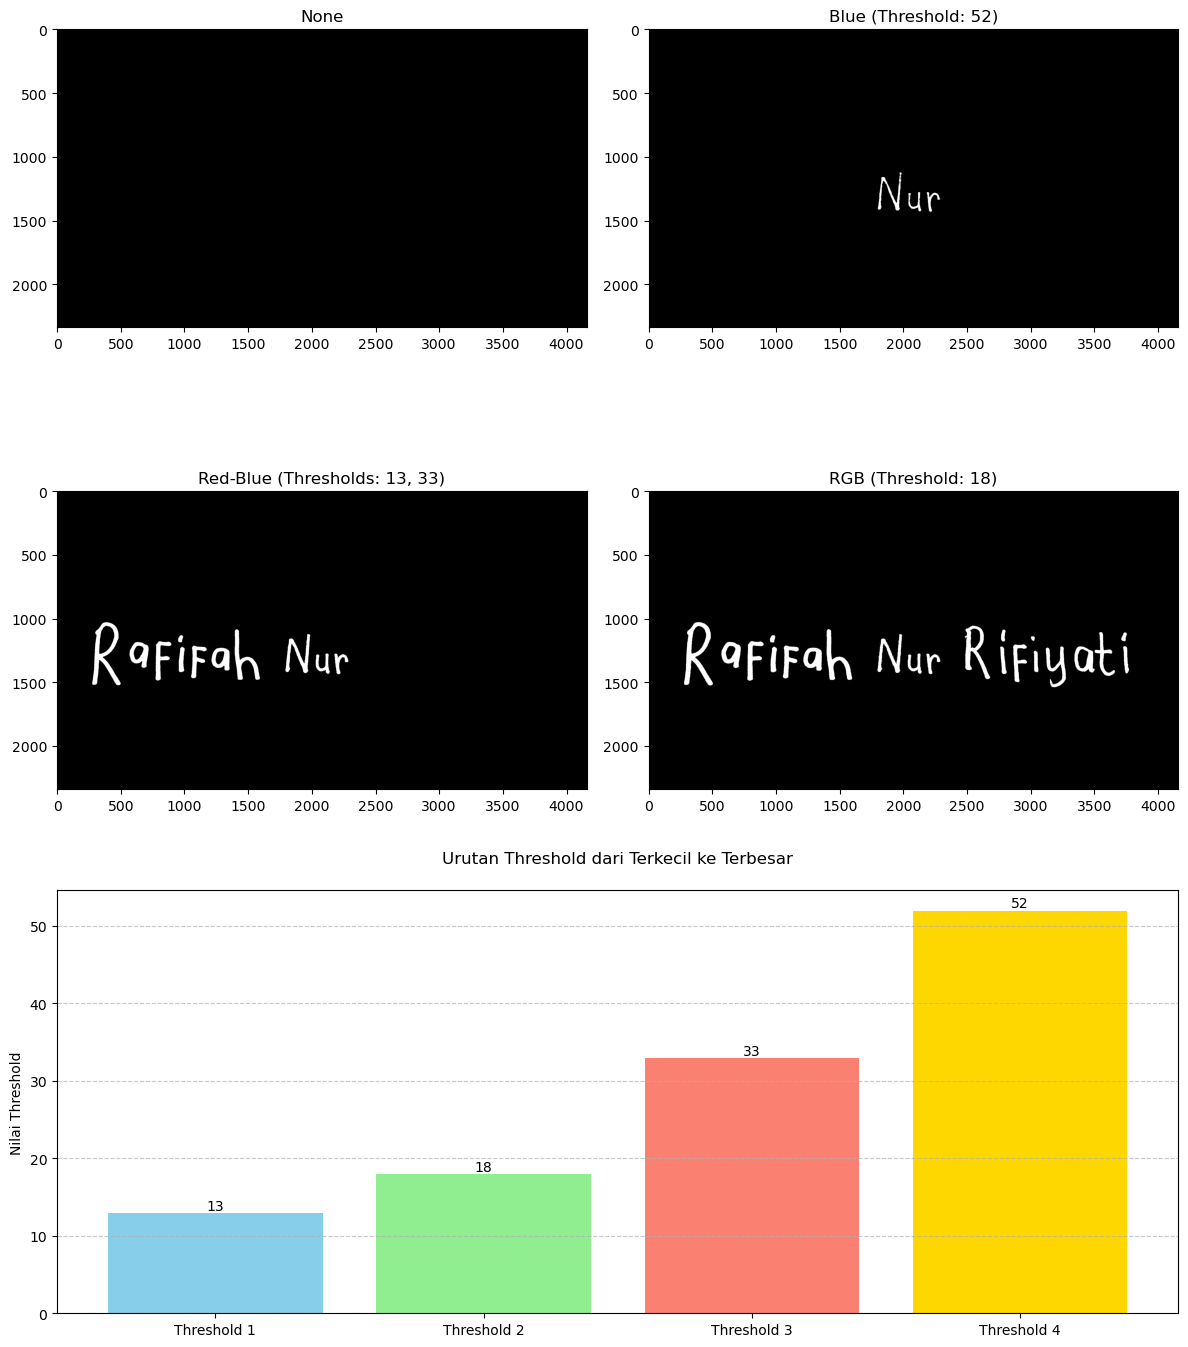


Threshold yang digunakan: [52, 13, 33, 18]
Threshold diurutkan dari nilai terkecil: [13, 18, 33, 52]


In [20]:
def calculate_dynamic_thresholds(img):
    mean_r, mean_g, mean_b = np.mean(img, axis=(0,1))
    std_r, std_g, std_b = np.std(img, axis=(0,1))
    
    blue_thresh = int(max(mean_b - mean_r, mean_b - mean_g) + 2*std_b)
    red_blue_low = int(min(std_r, std_b) * 0.7) 
    red_blue_high = int(max(std_r, std_b) * 1.2) 
    rgb_thresh = int((std_r + std_g + std_b)/3 * 0.8) 
    
    return {
        'blue': blue_thresh,
        'red_blue_low': red_blue_low,
        'red_blue_high': red_blue_high,
        'rgb': rgb_thresh
    }

def deteksi_tulisan(img, mode='none', thresholds=None):
    r = img[:, :, 0].astype(np.int16)
    g = img[:, :, 1].astype(np.int16)
    b = img[:, :, 2].astype(np.int16)
    hasil = np.zeros_like(img)

    if mode == 'blue':
        mask = (b > r + thresholds['blue']) & (b > g + thresholds['blue'])
    elif mode == 'red_blue':
        mask = ((r > g + thresholds['red_blue_high']) & (r > b + thresholds['red_blue_low'])) | \
               ((b > r + thresholds['red_blue_high']) & (b > g + thresholds['red_blue_low']))
    elif mode == 'rgb':
        mask = ((r > g + thresholds['rgb']) & (r > b)) | \
               ((g > r + thresholds['rgb']) & (g > b)) | \
               ((b > g + thresholds['rgb']) & (b > r))
    else:
        mask = np.zeros_like(r, dtype=bool)

    hasil[mask] = [255, 255, 255]
    return hasil

img = cv2.imread("nama.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

thresholds = calculate_dynamic_thresholds(img)
print("Thresholds yang dihitung:", thresholds)

results = {
    'none': deteksi_tulisan(img, 'none'),
    'blue': deteksi_tulisan(img, 'blue', thresholds),
    'red_blue': deteksi_tulisan(img, 'red_blue', thresholds),
    'rgb': deteksi_tulisan(img, 'rgb', thresholds)
}

plt.figure(figsize=(12, 14))

plt.subplot(3, 2, 1) 
plt.imshow(results['none'])
plt.title("None")

plt.subplot(3, 2, 2) 
plt.imshow(results['blue'])
plt.title(f"Blue (Threshold: {thresholds['blue']})")

plt.subplot(3, 2, 3) 
plt.imshow(results['red_blue'])
plt.title(f"Red-Blue (Thresholds: {thresholds['red_blue_low']}, {thresholds['red_blue_high']})")

plt.subplot(3, 2, 4)
plt.imshow(results['rgb'])
plt.title(f"RGB (Threshold: {thresholds['rgb']})")

plt.subplot(3, 1, 3)  

all_thresholds = [
    thresholds['blue'],
    thresholds['red_blue_low'],
    thresholds['red_blue_high'],
    thresholds['rgb']
]
sorted_unique_thresholds = sorted(list(set(all_thresholds)))

bars = plt.bar(range(len(sorted_unique_thresholds)), sorted_unique_thresholds, 
               color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.xticks(range(len(sorted_unique_thresholds)), [f"Threshold {i+1}" for i in range(len(sorted_unique_thresholds))])
plt.title("Urutan Threshold dari Terkecil ke Terbesar", pad=20)
plt.ylabel("Nilai Threshold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nThreshold yang digunakan:", all_thresholds)
print("Threshold diurutkan dari nilai terkecil:", sorted_unique_thresholds)

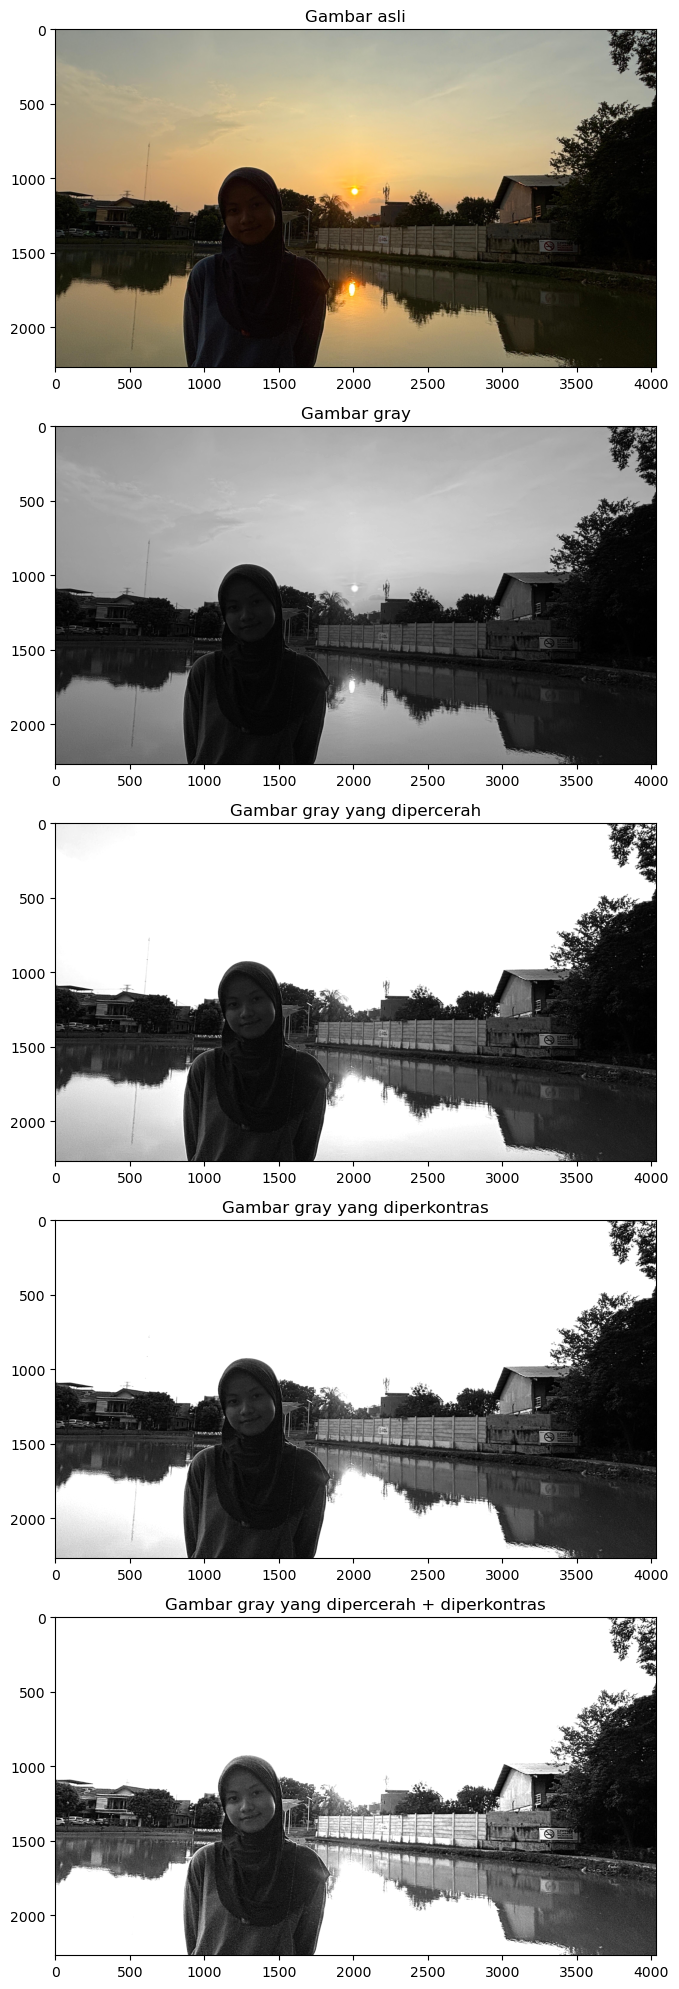

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('backlight.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

gray_bright = cv2.convertScaleAbs(gray, alpha=1.0, beta=100) 

gray_contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=0)

gray_bright_contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=100)

fig, axs = plt.subplots(5, 1, figsize=(10, 20))

axs[0].imshow(img_rgb)
axs[0].set_title("Gambar asli")

axs[1].imshow(gray, cmap='gray')
axs[1].set_title("Gambar gray")

axs[2].imshow(gray_bright, cmap='gray')
axs[2].set_title("Gambar gray yang dipercerah")

axs[3].imshow(gray_contrast, cmap='gray')
axs[3].set_title("Gambar gray yang diperkontras")

axs[4].imshow(gray_bright_contrast, cmap='gray')
axs[4].set_title("Gambar gray yang dipercerah + diperkontras")

plt.tight_layout()
plt.show()